In [137]:
import torch
import torch_geometric
import torch_geometric.transforms as T
from glob import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cftime

In [176]:
class ssp_data():
    def __init__(self, n=39) -> None:
        self.n = n
        self.raw = {}
        self.init_edge_list(n)
        self.y_file = 'data\\tas_scenario_245\\tas_mon_mod_ssp245_192_000.nc'
        self.x_file_list = [item for item in glob('data\\tas_scenario_245\\tas_mon_mod_ssp245_192_*.nc') if item not in [self.y_file]][0 : self.n]
        self.create_df()
        self.x = self.x.drop(columns=['tas_9', 'tas_8'])
        # self.x_tensor = self.create_tensors(self.x).T
        # self.y_tensor = self.create_tensors(self.y)
        # self.data = torch_geometric.data.Data(x=self.x_tensor, edge_index=self.edge_index.t().contiguous(), y=self.y_tensor)
        # self.split_data()
        # self.mini_graphs()

    def init_edge_list(self, n):
        self.edge_index = []
        for i in range(8):
            for j in range(8):
                if i != j:
                    self.edge_index.append([i, j])
        self.edge_index = torch.tensor(self.edge_index, dtype=torch.long)

    def create_df(self):
        self.x = pd.DataFrame()
        i = 1
        for filename in self.x_file_list:
            print('Processing', filename)
            if self.x.empty:
                self.x = self.create_vector(filename)
            else:
                self.x[f'tas_{i}'] = self.create_vector(filename)['tas']
                # self.x = self.x.merge(self.create_vector(filename), how='inner', on=['time', 'lat', 'lon'], suffixes=(None, f'_{i}'))
            
            # print(self.x)
            i += 1
        
        self.y = self.create_vector(self.y_file)['tas']

    def create_vector(self, filename):
        data = xr.open_dataset(filename)
        try:
            datetimeindex = data.indexes['time'].to_datetimeindex()
            data['time'] = datetimeindex
        except AttributeError:
            pass
        self.raw[filename] = data
        df = self.raw[filename].to_dataframe().reset_index()
        # for col in ['lat', 'lon', 'tas']:
            # df[col] = df[col].round(2)
        # self.raw_df[filename] = df
        # cftime_1960 = cftime.DatetimeNoLeap(1960, 1, 1, 12, 0, 0, 0, has_year_zero=True)
        # cftime_1970 = cftime.DatetimeNoLeap(1970, 12, 30, 12, 0, 0, 0, has_year_zero=True)
        # print(df)
        df = df.query('lat >= -44 & lat <= -12 & lon >= 288 & lon <= 336')
        ret = df[['time', 'lat', 'lon', 'tas']]#.loc[(df['time'].dt.year > 1960) & (df['time'].dt.year < 1980), ['time', 'lat', 'lon', 'tas']]

        # print(ret, ret.dtypes)
        return ret

    
    def get_device(self):
        if torch.cuda.is_available():
            device = torch.device('cuda:0')
        else:
            device = torch.device('cpu') # don't have GPU 
        return device

    def create_tensors(self, df):
        device = self.get_device()
        return torch.from_numpy(df.values).float().to(device)
    
    def mini_graphs(self):
        df = self.x
        df['x_tensor'] = df.apply(lambda row: torch.tensor(row.values.flatten()), axis=1)
        df['y'] = self.y
        df['y_tensor'] = df['y'].apply(lambda y: torch.tensor(y))
        df['data_obj'] = df.apply(lambda row: torch_geometric.data.Data(x=df['x_tensor'], edge_index=self.edge_index.t().contiguous(), y=df['y_tensor']), axis=1)
        self.batch_graphs = df['data_obj']
    
    def split_data(self):
        transform = T.Compose([T.RandomNodeSplit(num_test=1000, num_val=1000)])
        self.data = transform(self.data) 


In [177]:
ssp_data = ssp_data(n=10)

Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_001.nc
Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_002.nc
Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_003.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\2637710815.py:43: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_004.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\2637710815.py:43: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_005.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\2637710815.py:43: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_006.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\2637710815.py:43: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_007.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\2637710815.py:43: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_008.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\2637710815.py:43: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_009.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\2637710815.py:43: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_010.nc


C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\2637710815.py:43: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


In [178]:
ssp_data.x

,time,lat,lon,tas,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_10
21861096,1850-01-16 12:00:00,-43.125,288.750,284.172943,280.155243,284.810547,284.570770,284.548645,283.363861,283.986420,283.968140
21861097,1850-02-15 00:00:00,-43.125,288.750,283.968536,281.496246,285.178925,284.472595,284.182495,283.724731,283.756561,285.327301
21861098,1850-03-16 12:00:00,-43.125,288.750,283.372498,280.635193,283.098633,280.817993,281.858978,281.619659,281.791290,281.982056
21861099,1850-04-16 00:00:00,-43.125,288.750,280.703217,276.897705,279.815308,278.452454,276.804077,277.914673,277.956970,278.064484
21861100,1850-05-16 12:00:00,-43.125,288.750,277.591003,273.773193,276.833496,275.143402,275.067902,275.281189,275.322113,275.609619
...,...,...,...,...,...,...,...,...,...,...,...
35818699,2100-08-16 12:00:00,-13.125,335.625,296.761230,296.783752,299.635040,NaN,298.350067,298.096161,298.048889,298.975952
35818700,2100-09-16 00:00:00,-13.125,335.625,296.622650,296.726624,299.606720,NaN,298.110535,297.840057,297.826385,298.944855
35818701,2100-10-16 12:00:00,-13.125,335.625,297.122528,297.602753,299.904297,NaN,298.409607,298.267426,298.292328,299.364166
35818702,2100-11-16 00:00:00,-13.125,335.625,297.918610,298.609894,300.415588,NaN,299.297119,299.203888,299.236328,300.075256


<Axes: >

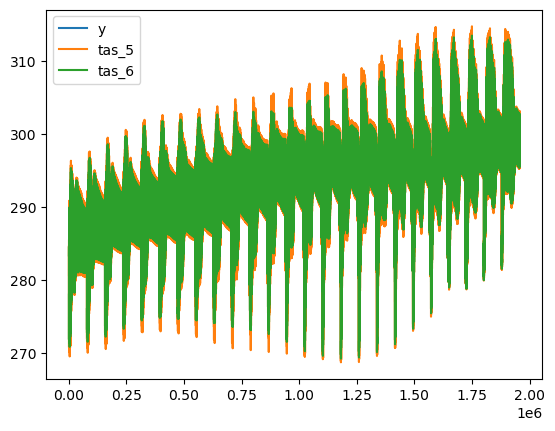

In [185]:
df = ssp_data.x.reset_index(drop=True)
df['y'] = ssp_data.y
df1 = df.query('lat==-43.125 & lon==288.750')
df.plot(y=['y', 'tas_5', 'tas_6'])


In [110]:
ssp_data.data

Data(x=[8, 70200], edge_index=[2, 56], y=[70200])

In [88]:
for col in ssp_data.x.columns:
    print(ssp_data.x[col].isna().sum())

0
0
0
0
0
0
0
0
0
0
70200
70200
0


In [57]:
ssp_data.x[ssp_data.x.isna().any(axis=1)]

,time,lat,lon,tas,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7
37,1964-02-15 12:00:00,-43.125,288.750,286.610809,279.847229,NaN,NaN,NaN,NaN,NaN
85,1968-02-15 12:00:00,-43.125,288.750,286.647003,281.439758,NaN,NaN,NaN,NaN,NaN
145,1964-02-15 12:00:00,-43.125,290.625,289.057434,284.443146,NaN,NaN,NaN,NaN,NaN
193,1968-02-15 12:00:00,-43.125,290.625,289.101013,286.768890,NaN,NaN,NaN,NaN,NaN
253,1964-02-15 12:00:00,-43.125,292.500,292.429688,288.975159,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
69961,1968-02-15 12:00:00,-13.125,331.875,297.861481,300.113892,NaN,NaN,NaN,NaN,NaN
70021,1964-02-15 12:00:00,-13.125,333.750,297.736603,299.800446,NaN,NaN,NaN,NaN,NaN
70069,1968-02-15 12:00:00,-13.125,333.750,297.684784,300.062622,NaN,NaN,NaN,NaN,NaN
70129,1964-02-15 12:00:00,-13.125,335.625,297.670563,299.548645,NaN,NaN,NaN,NaN,NaN


In [106]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.edge_weight = torch.nn.Parameter(torch.ones(ssp_data.data.num_edges))
        self.conv1 = GCNConv(ssp_data.data.num_node_features, 16)
        self.conv2 = GCNConv(16, ssp_data.data.num_node_features)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        # print(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        x = self.conv2(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))

        return x


In [154]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = ssp_data.data.to(device)
train_loss = []
test_loss = []
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(10000):
    optimizer.zero_grad()
    out = model(data)
    loss = F.mse_loss(out, data.y)
    loss_l.append(loss.item())
    print(epoch, loss)
    loss.backward()
    optimizer.step()

C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\3127271258.py:11: UserWarning: Using a target size (torch.Size([70200])) that is different to the input size (torch.Size([8, 70200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, data.y)


0 tensor(85159.6875, grad_fn=<MseLossBackward0>)
1 tensor(85159.7266, grad_fn=<MseLossBackward0>)
2 tensor(85039.5547, grad_fn=<MseLossBackward0>)
3 tensor(1388156.3750, grad_fn=<MseLossBackward0>)
4 tensor(70265.1641, grad_fn=<MseLossBackward0>)
5 tensor(85030.5078, grad_fn=<MseLossBackward0>)
6 tensor(85028.9766, grad_fn=<MseLossBackward0>)
7 tensor(85026.9766, grad_fn=<MseLossBackward0>)
8 tensor(85024.6016, grad_fn=<MseLossBackward0>)
9 tensor(85021.9141, grad_fn=<MseLossBackward0>)
10 tensor(85018.9609, grad_fn=<MseLossBackward0>)
11 tensor(85015.7812, grad_fn=<MseLossBackward0>)
12 tensor(85012.4062, grad_fn=<MseLossBackward0>)
13 tensor(85008.8672, grad_fn=<MseLossBackward0>)
14 tensor(85005.1719, grad_fn=<MseLossBackward0>)
15 tensor(85001.3438, grad_fn=<MseLossBackward0>)
16 tensor(84997.3984, grad_fn=<MseLossBackward0>)
17 tensor(84993.3516, grad_fn=<MseLossBackward0>)
18 tensor(84989.2031, grad_fn=<MseLossBackward0>)
19 tensor(84984.9688, grad_fn=<MseLossBackward0>)
20 tenso

KeyboardInterrupt: 

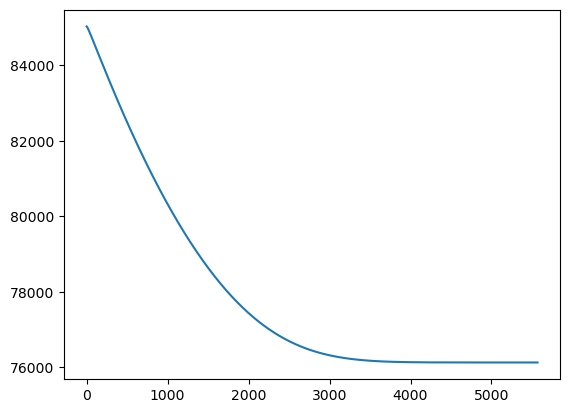

In [186]:
plt.plot(loss_l[5:])

In [155]:
model.edge_weight

Parameter containing:
tensor([1.0281e+00, 1.0281e+00, 1.0281e+00, 1.0281e+00, 1.0281e+00, 1.0281e+00,
        1.0281e+00, 2.3427e-01, 2.3410e-01, 2.3374e-01, 2.3368e-01, 2.3573e-01,
        2.3519e-01, 2.3605e-01, 2.3806e-01, 2.3909e-01, 2.3808e-01, 2.3746e-01,
        2.4096e-01, 2.3891e-01, 2.4134e-01, 9.2244e-01, 9.2243e-01, 9.2242e-01,
        9.2242e-01, 9.2242e-01, 9.2241e-01, 9.2243e-01, 9.2188e-01, 9.2189e-01,
        9.2188e-01, 9.2188e-01, 9.2185e-01, 9.2185e-01, 9.2186e-01, 5.6408e-04,
        5.8485e-04, 5.6915e-04, 5.9098e-04, 5.5358e-04, 5.0742e-04, 5.4165e-04,
        1.1606e-05, 1.2645e-05, 1.1900e-05, 1.3083e-05, 1.1248e-05, 8.5484e-06,
        1.0548e-05, 1.9385e-02, 1.9439e-02, 1.9907e-02, 1.9607e-02, 1.9089e-02,
        1.9989e-02, 1.9699e-02], requires_grad=True)

In [151]:
weights = model.edge_weight.tolist()
G = nx.Graph()

[1.0621346235275269,
 1.061711072921753,
 1.0619031190872192,
 1.0618290901184082,
 1.0618948936462402,
 1.0618715286254883,
 1.0617121458053589,
 1.0494590997695923,
 1.049369215965271,
 1.0494438409805298,
 1.0494590997695923,
 1.049442172050476,
 1.0494471788406372,
 1.0493615865707397,
 0.9245324730873108,
 0.9244717955589294,
 0.9245195984840393,
 0.9244185090065002,
 0.9245076179504395,
 0.9244663715362549,
 0.9243170619010925,
 0.6722093820571899,
 0.6717312335968018,
 0.6721544861793518,
 0.6738019585609436,
 0.6734118461608887,
 0.6734402775764465,
 0.6730117797851562,
 0.10454306751489639,
 0.10630414634943008,
 0.11099547147750854,
 0.10787973552942276,
 0.10195371508598328,
 0.10563800483942032,
 0.11204907298088074,
 0.6113467812538147,
 0.6118078827857971,
 0.6131083369255066,
 0.6117194294929504,
 0.6119213104248047,
 0.6113260984420776,
 0.6138107776641846,
 0.16995438933372498,
 0.1700158566236496,
 0.17485535144805908,
 0.17009152472019196,
 0.17025677859783173,
 0.16

In [108]:
model.eval()
out = model(data)
mse = F.mse_loss(out, data.y)
print(f'MSE: {mse:.4f}')

MSE: 84940.0234


C:\Users\jqcla\AppData\Local\Temp\ipykernel_17512\121057100.py:3: UserWarning: Using a target size (torch.Size([70200])) that is different to the input size (torch.Size([8, 70200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = F.mse_loss(out, data.y)


In [149]:
import networkx as nx

edge_index = ssp_data.data.edge_index
x = ssp_data.data.x

data = torch_geometric.data.Data(x=x, edge_index=edge_index)
g = torch_geometric.utils.to_networkx(data, to_undirected=True)

nx.draw(g)


TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [117]:
ssp_data.data.edge_index

tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
         3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
         6, 7, 7, 7, 7, 7, 7, 7],
        [1, 2, 3, 4, 5, 6, 7, 0, 2, 3, 4, 5, 6, 7, 0, 1, 3, 4, 5, 6, 7, 0, 1, 2,
         4, 5, 6, 7, 0, 1, 2, 3, 5, 6, 7, 0, 1, 2, 3, 4, 6, 7, 0, 1, 2, 3, 4, 5,
         7, 0, 1, 2, 3, 4, 5, 6]])